# UNIVARIATE LSTM

In [28]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [29]:
df = pd.read_csv(r"C:\Users\hp\PycharmProjects\stock_models\data\SPY.csv")

In [30]:
data = df.sort_index(ascending=True, axis=0)

In [31]:
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

In [32]:
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [33]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [34]:
dataset = new_data.values
train = dataset[0:6500,:]
valid = dataset[6500:,:]

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [38]:
print(x_train.shape[1])
# scaler=MinMaxScaler(feature_range=(0,1))
# df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

60


In [40]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(60,1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

NotImplementedError: Cannot convert a symbolic Tensor (lstm_3/strided_slice:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported

In [12]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train_data, test_data = df2[0:training_size,:],df2[training_size:len(df2),:1]

In [13]:
training_size,test_size

(818, 441)

In [14]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step -1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [15]:
time_step =100
X_train, y_train = create_dataset(train_data, time_step)
X_test , y_test = create_dataset(test_data, time_step)



In [16]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(717, 100) (340, 100) (717,) (340,)


In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 3s 285ms/step - loss: 0.0095 - val_loss: 0.1329
Epoch 2/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0016 - val_loss: 0.0636
Epoch 3/100
12/12 [==============================] - 1s 124ms/step - loss: 9.5817e-04 - val_loss: 0.0673
Epoch 4/100
12/12 [==============================] - 2s 125ms/step - loss: 5.4834e-04 - val_loss: 0.0162
Epoch 5/100
12/12 [==============================] - 1s 124ms/step - loss: 3.4395e-04 - val_loss: 0.0034
Epoch 6/100
12/12 [==============================] - 1s 123ms/step - loss: 3.1839e-04 - val_loss: 0.0043
Epoch 7/100
12/12 [==============================] - 1s 121ms/step - loss: 3.8424e-04 - val_loss: 0.0073
Epoch 8/100
12/12 [==============================] - 1s 122ms/step - loss: 3.2396e-04 - val_loss: 0.0066
Epoch 9/100
12/12 [==============================] - 1s 121ms/step - loss: 3.0083e-04 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 1s 115ms/

In [23]:
import tensorflow as tf

In [24]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [25]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [28]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

43.81915486040177

In [30]:
math.sqrt(mean_squared_error(y_test,test_predict))

97.92820454611504

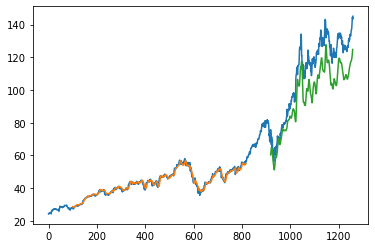

In [33]:


### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [34]:
len(test_data)

441

In [38]:
x_input=test_data[341:-2].reshape(1,-1)
x_input.shape
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=98
i=0
while(i<2):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.83185446]
99
[0.83185446]
100
[[0.8318544626235962], [0.8318544626235962]]
